### Name : Riddhick Dalal
### Reg No : 24-27-14
### Course : MTech Data Science
### Assignment 3

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Q1. Linear Regression

In [16]:
def linear(X,Y): #function to calculate theta values 
    X=X.reshape(X.shape[0],1)
    Y=Y.reshape(Y.shape[0],1)
    ones=np.ones(X.shape[0]).reshape(X.shape[0],1)
    X=np.append(ones,X,axis=1)
    xTranspose=X.T
    X_t_X=np.matmul(xTranspose,X)
    if(np.linalg.det(X_t_X)==0):
        X_inv=np.linalg.pinv(X_t_X)
    else:
        X_inv=np.linalg.inv(X_t_X)
    temp=np.matmul(X_inv,xTranspose)
    thetas=np.matmul(temp,Y)
    thetas=thetas
    return thetas

In [17]:
def predict(thetas,x): #function to predict value for given x
    x=x.reshape(x.shape[0],1)
    ones=np.ones(x.shape[0]).reshape(x.shape[0],1)
    x=np.append(ones,x,axis=1)
    values=np.matmul(x,thetas)
    return values

In [18]:
x = np.random.rand(100, 1) * 10  # Random x values in range [0, 10]
y = 2 + 3 * x + x**2 + np.random.randn(100, 1) * 10 
thetas_linear=linear(x,y)
print(linear(x,y))

[[-16.68286767]
 [ 13.1414623 ]]


In [19]:
y_predicted=predict(thetas_linear,x)

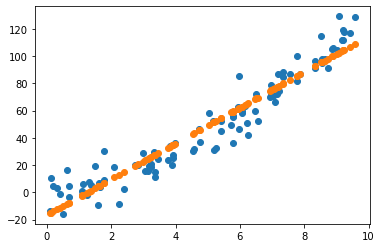

In [20]:
plt.scatter(x,y)
plt.scatter(x,y_predicted)
plt.show()

### Q2.Polynomial Regression

In [21]:
def polynomial(X,Y,degree):
    X=X.reshape(X.shape[0],1)
    ones=np.ones(X.shape[0]).reshape(X.shape[0],1)
    X=np.append(ones,X,axis=1)
    X=np.repeat(X,[1,degree],axis=1) #Creation of polynomial matrix of X based on the degree.
    Y=Y.reshape(Y.shape[0],1)
    X=X**np.arange(0,X.shape[1])
    xTranspose=X.T
    X_t_X=np.matmul(xTranspose,X)
    if(np.linalg.det(X_t_X)==0):  #if determinant =0 we calculate pseudo inverse instead of inverse
        X_inv=np.linalg.pinv(X_t_X)
    else:
        X_inv=np.linalg.inv(X_t_X)
    temp=np.matmul(X_inv,xTranspose)
    thetas=np.matmul(temp,Y)
    thetas=thetas
    return thetas  


In [22]:
def poly_predict(x,thetas):
    degree=thetas.shape[0]-1
    x=x.reshape(x.shape[0],1)
    ones=np.ones(x.shape[0]).reshape(x.shape[0],1)
    x=np.append(ones,x,axis=1)
    x=np.repeat(x,[1,degree],axis=1)
    x=x**np.arange(0,x.shape[1])
    values=np.matmul(x,thetas)
    return values

In [23]:
thetas=polynomial(x,y,2)

In [24]:
y_pred2=poly_predict(x,thetas)

In [25]:
print(y_pred2)

[[ 59.53575542]
 [  6.10482803]
 [101.76492227]
 [ 26.13878127]
 [ 43.92852417]
 [ 21.76201666]
 [109.15566136]
 [ 88.11929229]
 [ 18.20055373]
 [ 15.81755674]
 [ 78.68633275]
 [ 72.84738821]
 [112.80131705]
 [  7.08190124]
 [115.60027927]
 [ 55.66932069]
 [ 47.12225177]
 [ 21.87400058]
 [  7.97135801]
 [  7.97712429]
 [  3.58827813]
 [101.57305625]
 [ 56.84663918]
 [ 75.57027719]
 [  0.30447026]
 [ 73.81225957]
 [ 97.52490668]
 [ 28.21326906]
 [ 28.87788181]
 [ 63.34403008]
 [114.76109337]
 [ 55.16822996]
 [115.60652881]
 [ -0.17761222]
 [  6.85822398]
 [  3.46724874]
 [ 64.23183867]
 [ 35.83778852]
 [111.25924435]
 [ 52.57199206]
 [ -0.47964075]
 [ 22.77778783]
 [ 19.63880492]
 [ 58.54481611]
 [ 28.12131148]
 [  1.25761104]
 [ 10.44824933]
 [ 55.10590706]
 [  6.75750382]
 [ 86.57602573]
 [ 72.08243801]
 [ 74.9395094 ]
 [105.42577794]
 [116.07335456]
 [123.59656138]
 [ 42.0241677 ]
 [ -1.03756731]
 [103.43280961]
 [ 82.61602574]
 [ 59.83279883]
 [ 44.83346548]
 [ 71.83026888]
 [ 26.86

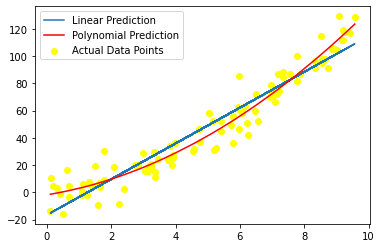

In [26]:
plt.scatter(x,y,color='yellow',label="Actual Data Points")
plt.plot(x,y_predicted,label="Linear Prediction")
plt.plot(np.sort(x, axis=0), np.sort(y_pred2, axis=0),color="red",label="Polynomial Prediction")
plt.legend()
plt.show()

### 3. Outlier Detection and Removal


In [31]:
x1=np.array([1,2,3,4,5,6])
y1=np.array([-234,5,7,10,974,12.45])

with_outlierTheta=linear(x1,y1)
print('Theta Values with Outliers:')
print(with_outlierTheta)

print('Value for predicted Y for same X values while the input data had outliers:')
print(predict(with_outlierTheta,x1))

Theta Values with Outliers:
[[-285.15]
 [ 118.35]]
Value for predicted Y for same X values while the input data had outliers:
[[-166.8 ]
 [ -48.45]
 [  69.9 ]
 [ 188.25]
 [ 306.6 ]
 [ 424.95]]


### So there is visible difference between the actual values and predicted values. Thus we can access the effects of outliers.

#### We will use Inter Quartile Range to detect and remove outlier. Where any point having value < Q1-1.5xIQR and value > Q3+1.5xIQR will be treated as outlier. Here Q1 is 25th percentile and Q3 is 75th percentile and the value of IQR is calculated using Q3-Q1. 

In [33]:


q1=np.quantile(y1,.25)
q3=np.quantile(y1,.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
index=[]
for i in range(len(y1)):
    if(y1[i]<lower_limit or y1[i]>upper_limit):
        index.append(i)

In [34]:
x1=np.delete(x1,index)
y1=np.delete(y1,index)
print('Values without outliers->')
print('x values : ',end='')
print(x1)
print('y values :',end='')
print(y1)

Values without outliers->
x values : [2 3 4 6]
y values :[ 5.    7.   10.   12.45]


In [35]:
without_outlierTheta=linear(x1,y1)
print('Theta Values with Outliers:')
print(without_outlierTheta)

print('Value for predicted Y for same X values while the input data had outliers:')
print(predict(without_outlierTheta,x1))

Theta Values with Outliers:
[[1.53571429]
 [1.88714286]]
Value for predicted Y for same X values while the input data had outliers:
[[ 5.31      ]
 [ 7.19714286]
 [ 9.08428571]
 [12.85857143]]


### Now the predicted y values are much closer to the actual y values